In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd

dfa = pd.read_csv('/kaggle/input/gold-prices/annual_csv.csv')
dfm = pd.read_csv('/kaggle/input/gold-prices/monthly_csv.csv')
dfa

In [ ]:
dfa['Price'].plot()

In [ ]:
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa.info()

In [ ]:
dfa['Date']

In [ ]:
dfa = pd.DataFrame(dfa['Price']).set_index(dfa['Date'])
dfa

In [ ]:
import matplotlib.pyplot as plt

time = pd.Timestamp('1990-12')
train = dfa.loc[:time,['Price']]
test = dfa.loc[time:,['Price']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
for s in range(0, 10):
    train['shift_{}'.format(s)] = train['Price'].shift(s)
    test['shift_{}'.format(s)] = test['Price'].shift(s)

train.head(10)

In [ ]:
X_train = train.dropna().drop('Price', axis=1)
y_train = train.dropna()[['Price']]

X_test = test.dropna().drop('Price', axis=1)
y_test = test.dropna()[['Price']]


X_train_t = X_train.values.reshape(X_train.values.shape[0], 10, 1)
X_test_t = X_test.values.reshape(X_test.values.shape[0], 10, 1)
X_train_t.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
import random as python_random
import tensorflow as tf

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(LSTM(100, input_shape=(10,1), activation='gelu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()

In [ ]:
history = model.fit(X_train_t, y_train, epochs=1000, batch_size=128)

In [ ]:
model.evaluate(X_test_t, y_test, batch_size=32)

In [ ]:
y_pred = model.predict(X_test_t, batch_size=32)
com = pd.DataFrame({'test' : y_test.Price.values,
             'pred' : y_pred.reshape(-1)})

In [ ]:
ax = com.plot()
plt.legend(['test', 'pred'])

In [ ]:
arr = []
data = X_test_t[-1].reshape(-1)

for i in range(10):
    y_pred = model.predict(data.reshape(1,-1,1), batch_size=32)
    y_pred = y_pred.reshape(-1)[0]
    data = np.roll(data,1)
    arr.append(y_pred)
arr.insert(0, y_test.Price[-1])
arr

In [ ]:
X = []
X.append(pd.Timestamp('2019-12'))
for i in range(0,10):
    X.append(pd.Timestamp('202'+str(i)+'-12'))
X

In [ ]:
plt.plot(dfa['Price'])
plt.plot(X[:],arr[:])

In [ ]:
plt.figure(figsize=(13,9))

plt.plot(dfa['Price']['2000-12-01':])

plt.plot(X[:4],arr[:4])

# Real Gold Price History

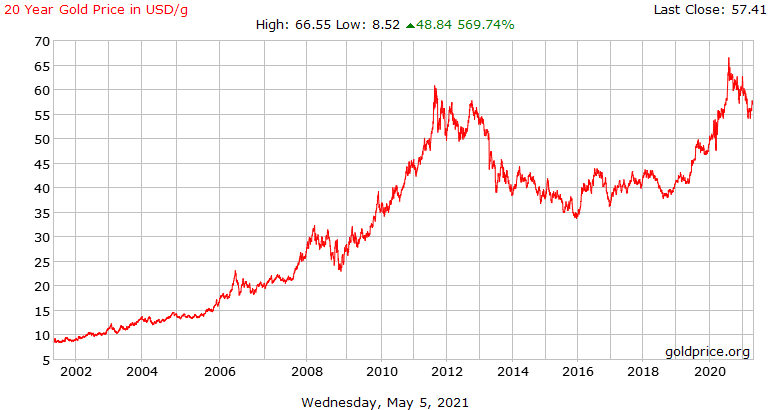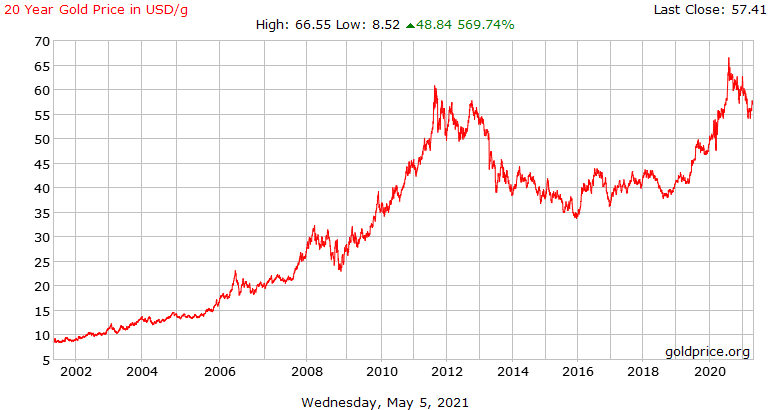

https://goldprice.org/ko/gold-price-charts/all-data-gold-price-history-in-hong-kong-dollars-per-kilogram